# Wine Quality Prediction Project
## Executive Summary
This project aims to predict wine quality based on physicochemical properties using machine learning techniques. By analyzing various chemical components such as acidity, pH, and alcohol content, we develop models to predict wine quality scores, providing valuable insights for wine producers and quality control processes.

## Project Overview
### Problem Statement
Wine quality assessment traditionally relies on expert wine tasters, which can be a subjective and resource-intensive method of establishing underlying wine quality. This project explores whether machine learning models can effectively predict wine quality based on objective chemical measurements, potentially complementing human expertise in the wine industry.

### Dataset Description
The dataset contains measurements of 11 chemical properties for various wines, along with their quality ratings:
- Input features: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol
- Output: Quality score (between 0 and 10)

### Project Goals
1. Develop accurate models for predicting wine quality from chemical properties
2. Identify the most influential chemical factors in wine quality
3. Provide insights for optimizing wine production processes

## Table of Contents
1. Data Overview
2. Data Visualisation and EDA
4. Feature Engineering and Selection
5. Model Development and Training
6. Results and Model Evaluation
7. Discussion and Conclusions
8. Future Recommendations

## Technical Approach
- **Type of Learning**: Supervised Learning
- **Task Type**: Regression/Classification
- **Evaluation Metrics**: RMSE, MAE, R-squared (for regression) / Accuracy, F1-score (for classification)
- **Primary Tools**: Python, Pandas, Scikit-learn

***

# Data Overview



## Dataset Source:

The data used in this project is made publicly available on Kaggle.

It can be found here: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset?select=WineQT.csv


## Dataset Description:

The dataset contains 11 variables relating to the chemical properties measured in wines and 1143 total observations (rows).

The variables measured are:

| **Feature**            | **Description**                                                                                                                                                                                                                                                                                                               |
|------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **fixed acidity**      | The level of non-volatile acids in wine, such as tartaric, malic, and citric acids. Fixed acidity is important for wine's flavor profile, with higher levels contributing to a more tart and acidic taste.                                                                                                                |
| **volatile acidity**   | The volatile organic acids that can affect the wine's aroma and flavor, such as acetic acid. High levels of volatile acidity can give a wine an unpleasant "vinegary" taste, while lower levels contribute to the wine's overall balance and complexity.                                                                 |
| **citric acid**        | Citric acid in wine is one of the types of fixed acids present in the wine, along with tartaric and malic acids. It provides freshness and adds a tart, tangy flavor to the wine.                                                                                                                                          |
| **residual sugar**     | Residual sugar refers to the amount of unfermented sugar left in the wine after the winemaking process. It affects the wine's sweetness level, with higher residual sugar levels resulting in a sweeter wine and lower levels resulting in a drier wine.                                                                       |
| **free sulfur dioxide**| Free sulfur dioxide is a type of sulfur compound that acts as a preservative, protecting the wine from spoilage and oxidation. Too much sulfur dioxide can give a wine an unpleasant, bitter taste, while too little can result in spoilage and an off-flavor.                                                            |
| **total sulfur dioxide**| Total sulfur dioxide in wine refers to the sum of both the bound and free forms of sulfur dioxide in the wine. It is an important factor in wine preservation, but high levels can impact the wine's flavor and aroma.                                                                                                 |
| **density**            | The weight of wine compared to its volume. Density can be used to determine the alcohol content of wine, with higher density indicating a higher alcohol content.                                                                                                                                                           |
| **pH**                 | A measure of the wine's acidity or alkalinity, with a pH range of 3–4 considered ideal for most wines. A lower pH indicates higher acidity, while a higher pH indicates a less acidic wine.                                                                                                                              |
| **sulphates**          | Sulfates in wine are a natural byproduct of fermentation and can also be added as a preservative. Higher levels of sulphates can result in a bitter taste, while lower levels can lead to a smoother and gentler flavor profile.                                                                                           |
| **alcohol**            | The amount of ethanol in wine, produced through fermentation. Alcohol contributes to the wine's body, flavor, and overall strength, with higher alcohol content resulting in a stronger and more flavorful wine.                                                                                                           |

Firstly, we will load necessary dependencies

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import math
import warnings
from scipy import stats
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

And secondly specify some visual parameters:

In [2]:
# Wine-themed palette
palette = ['#4a0404', '#8b0000', '#722f37', '#9b4b0d', '#c19a6b', '#6b2d0d']
bg_color = '#fdfcf6'  # Soft off-white background

# Define custom wine-themed colormap
wine_cmap = mcolors.LinearSegmentedColormap.from_list('wine_palette', palette, N=256)
# Create a lighter wine-themed colormap
wine_light_cmap = sns.light_palette('#8b0000', n_colors=256, as_cmap=True)

# Custom parameters
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    'grid.alpha': 0.3,
    'figure.figsize': (16, 6),
    'axes.titlesize': 'Large',
    'axes.labelsize': 'Large',
    'figure.facecolor': bg_color,
    'axes.facecolor': bg_color
}

sns.set_theme(style='whitegrid', palette=palette, rc=custom_params)
warnings.simplefilter("ignore", UserWarning)

Thirdly, the dataset itself:

In [3]:
# Load the dataset
df = pd.read_csv('WineQT.csv')

## Initial Data Review

Some initial review of the data available is conducted:

In [4]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst few rows of the dataset:")
display(df.head())

Dataset Shape: (1143, 13)

First few rows of the dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
print("\nDataset Info:")
display(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


None

In [6]:
print("\nBasic statistics of the dataset:")
display(df.describe())


Basic statistics of the dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [7]:
# Check for missing values
print("\nMissing values in each column:")
display(df.isnull().sum())


Missing values in each column:


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

## Initial Data Exploration Findings

### Dataset Overview
- Total samples: 1,143 wines
- Features: 12 (11 chemical properties + ID column)
- Target variable: quality (integer scores)

### Data Quality Assessment
1. **Completeness**:
   - No missing values in any columns
   - All features have the expected data types (float64 for measurements, int64 for quality and ID)

2. **Feature Characteristics**:
   - Quality scores range from 3 to 8 (out of theoretical 0-10)
   - Most features show significant variation, suggesting good potential for analysis
   - All chemical properties are in float format, allowing for precise measurements

3. **Value Ranges**:
   - Alcohol content: 8.4% to 14.9%
   - pH levels: 2.74 to 4.01 (typical wine range)
   - Fixed acidity: 4.6 to 15.9 g/dm^3
   - Density: 0.99007 to 1.00369 g/cm^3

***

# Data Visualisation and EDA

## Summary of EDA Techniques Employed

Exploratory Data Analysis (EDA) techniques employed included:

1. Histograms
2. Box plots
3. KDE distribution
4. Outlier analysis: z-score
5. Outlier analysis: heatmaps
6. Feature importance: mutual information

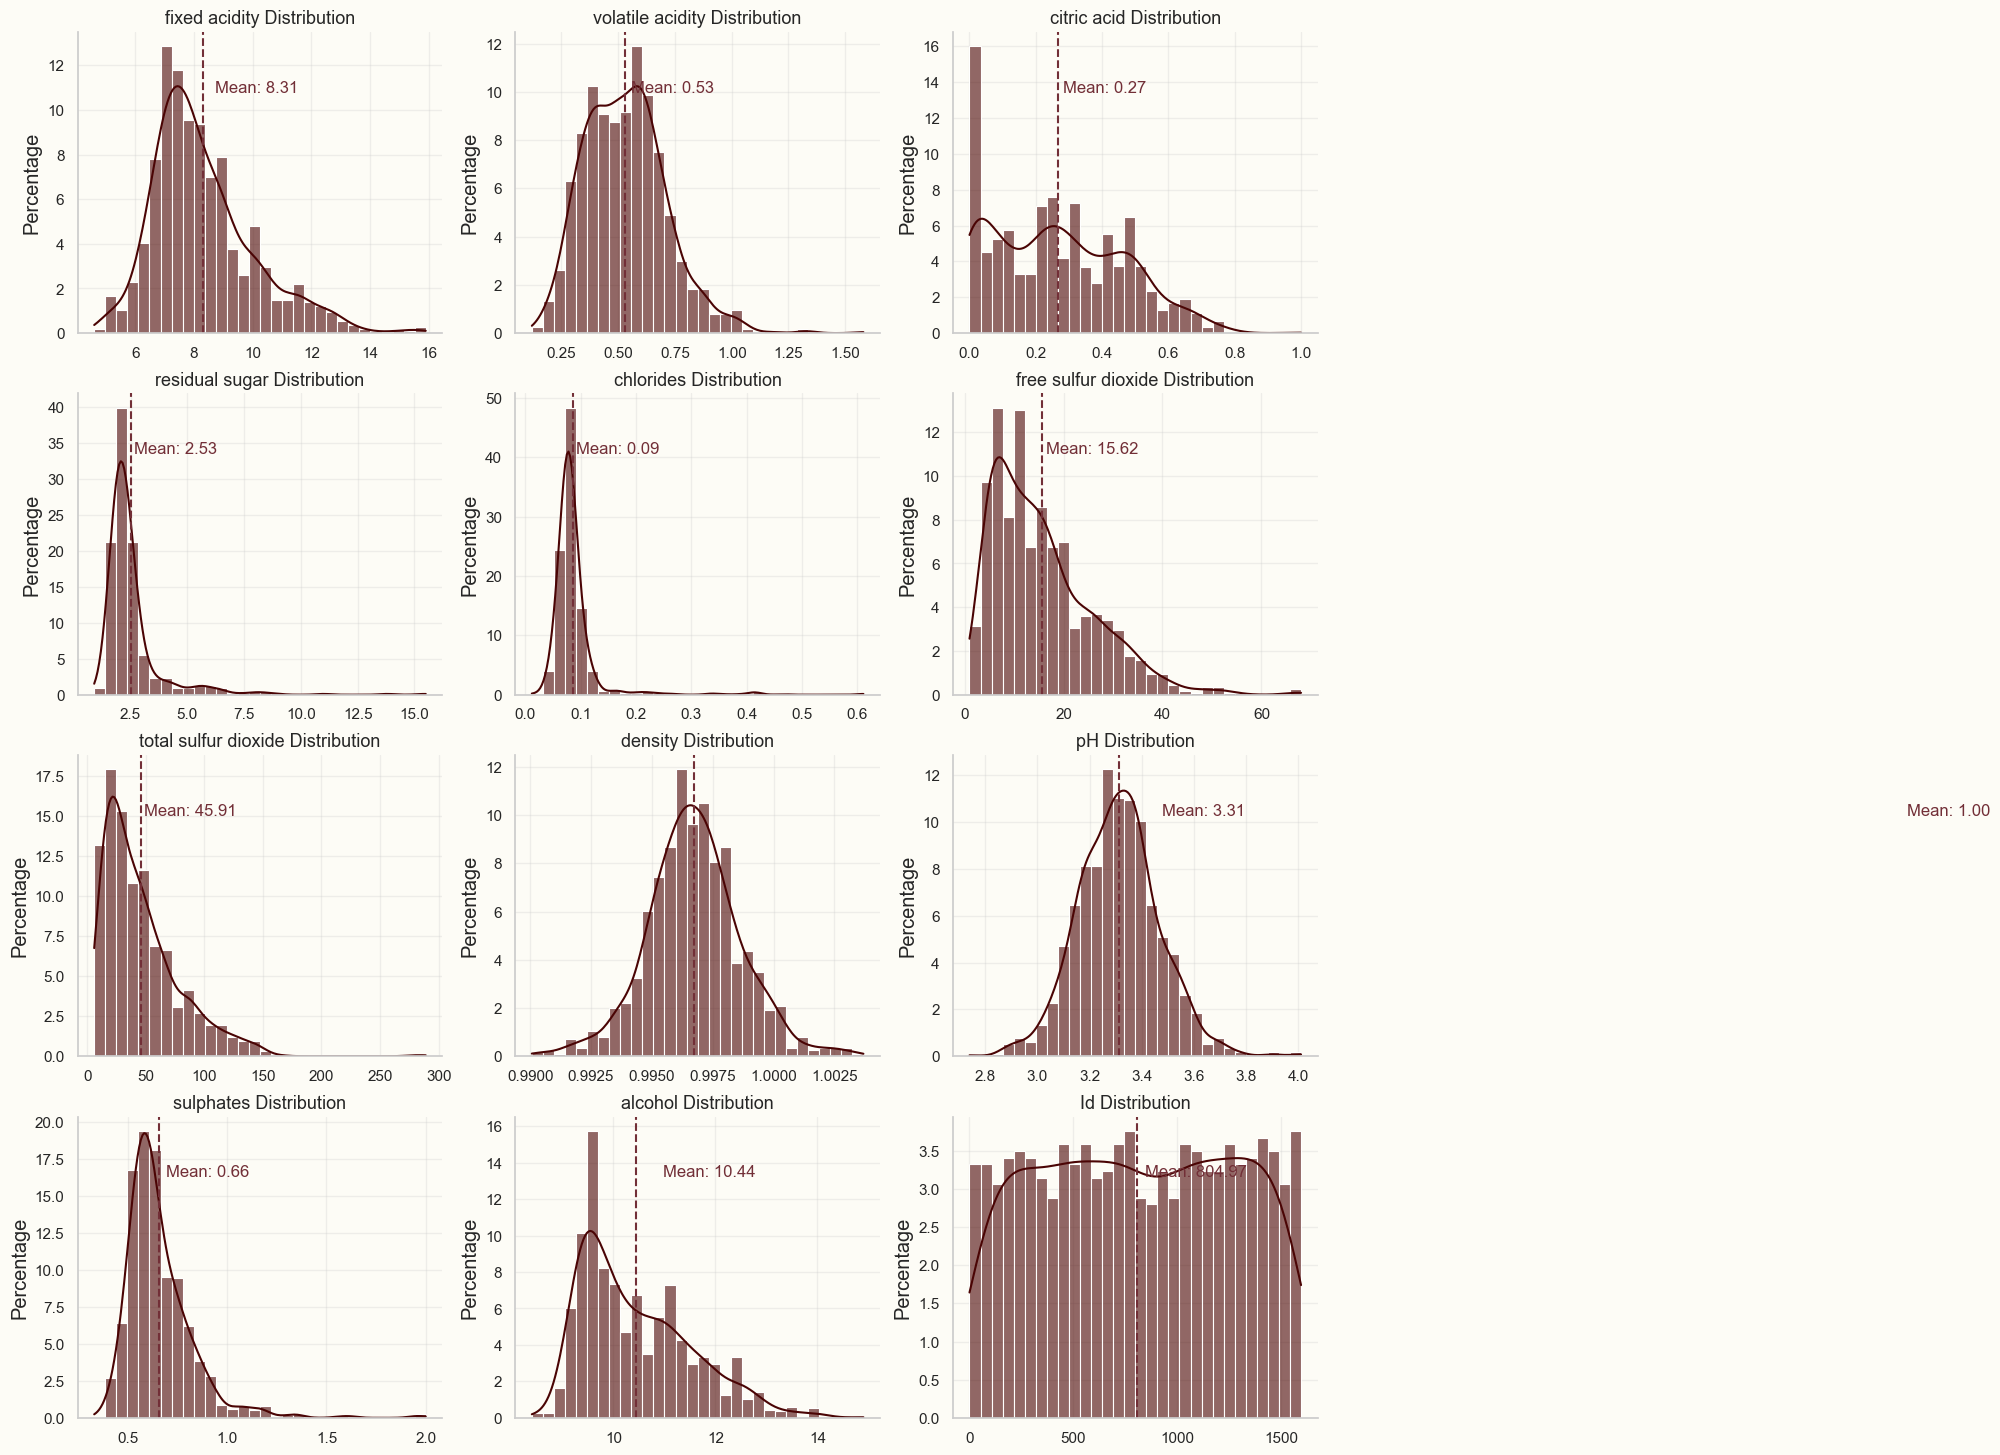

In [8]:
# Set up the figure layout
n_cols = 3  # Number of columns in the grid
n_bins = 30  
features = df.columns.drop('quality')  # Given quality is the target variable
n_rows = math.ceil(len(features)/n_cols)

# Create the subplot grid
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*4.5))
ax = ax.flatten()

# Define histogram parameters
hist_params = {
    'kde': True,      # Show KDE curve on top of histogram
    'alpha': 0.6,     # Transparency for bars
    'bins': n_bins,
    'stat': 'percent' # Show percentages instead of counts
}

# Color palette (using your project's color scheme)
palette = palette 

for i, col in enumerate(features):
    # Create histogram for each feature
    sns.histplot(
        data=df,
        x=col,
        color=palette[0],  # Use first color from palette
        **hist_params,
        ax=ax[i]
    )
    
    # Customize subplot
    ax[i].set_title(f'{col} Distribution', fontsize=13)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Percentage')
    
    # Add vertical line for mean
    mean_val = df[col].mean()
    ax[i].axvline(mean_val, color=palette[2], linestyle='--', linewidth=1.5)
    ax[i].text(
        x=mean_val + 0.05*mean_val, 
        y=0.8*ax[i].get_ylim()[1],
        s=f'Mean: {mean_val:.2f}',
        color=palette[2]
    )

# Hide empty subplots
for j in range(i+1, len(ax)):
    ax[j].axis('off')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'PCA Explained Variance')

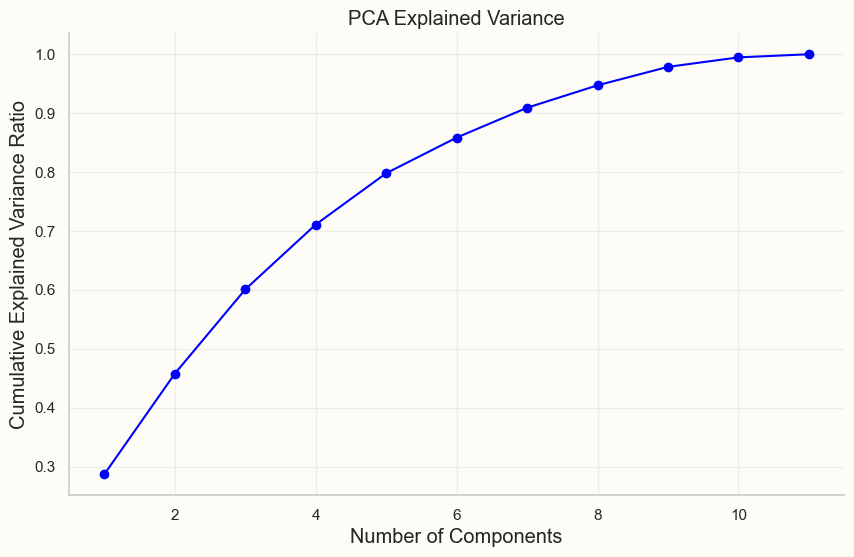

In [9]:
# 2. Principal Component Analysis (PCA) - showing mathematical rigor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Prepare data for PCA
X = df.drop(['quality', 'Id'], axis=1)
X_scaled = StandardScaler().fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Explained Variance')

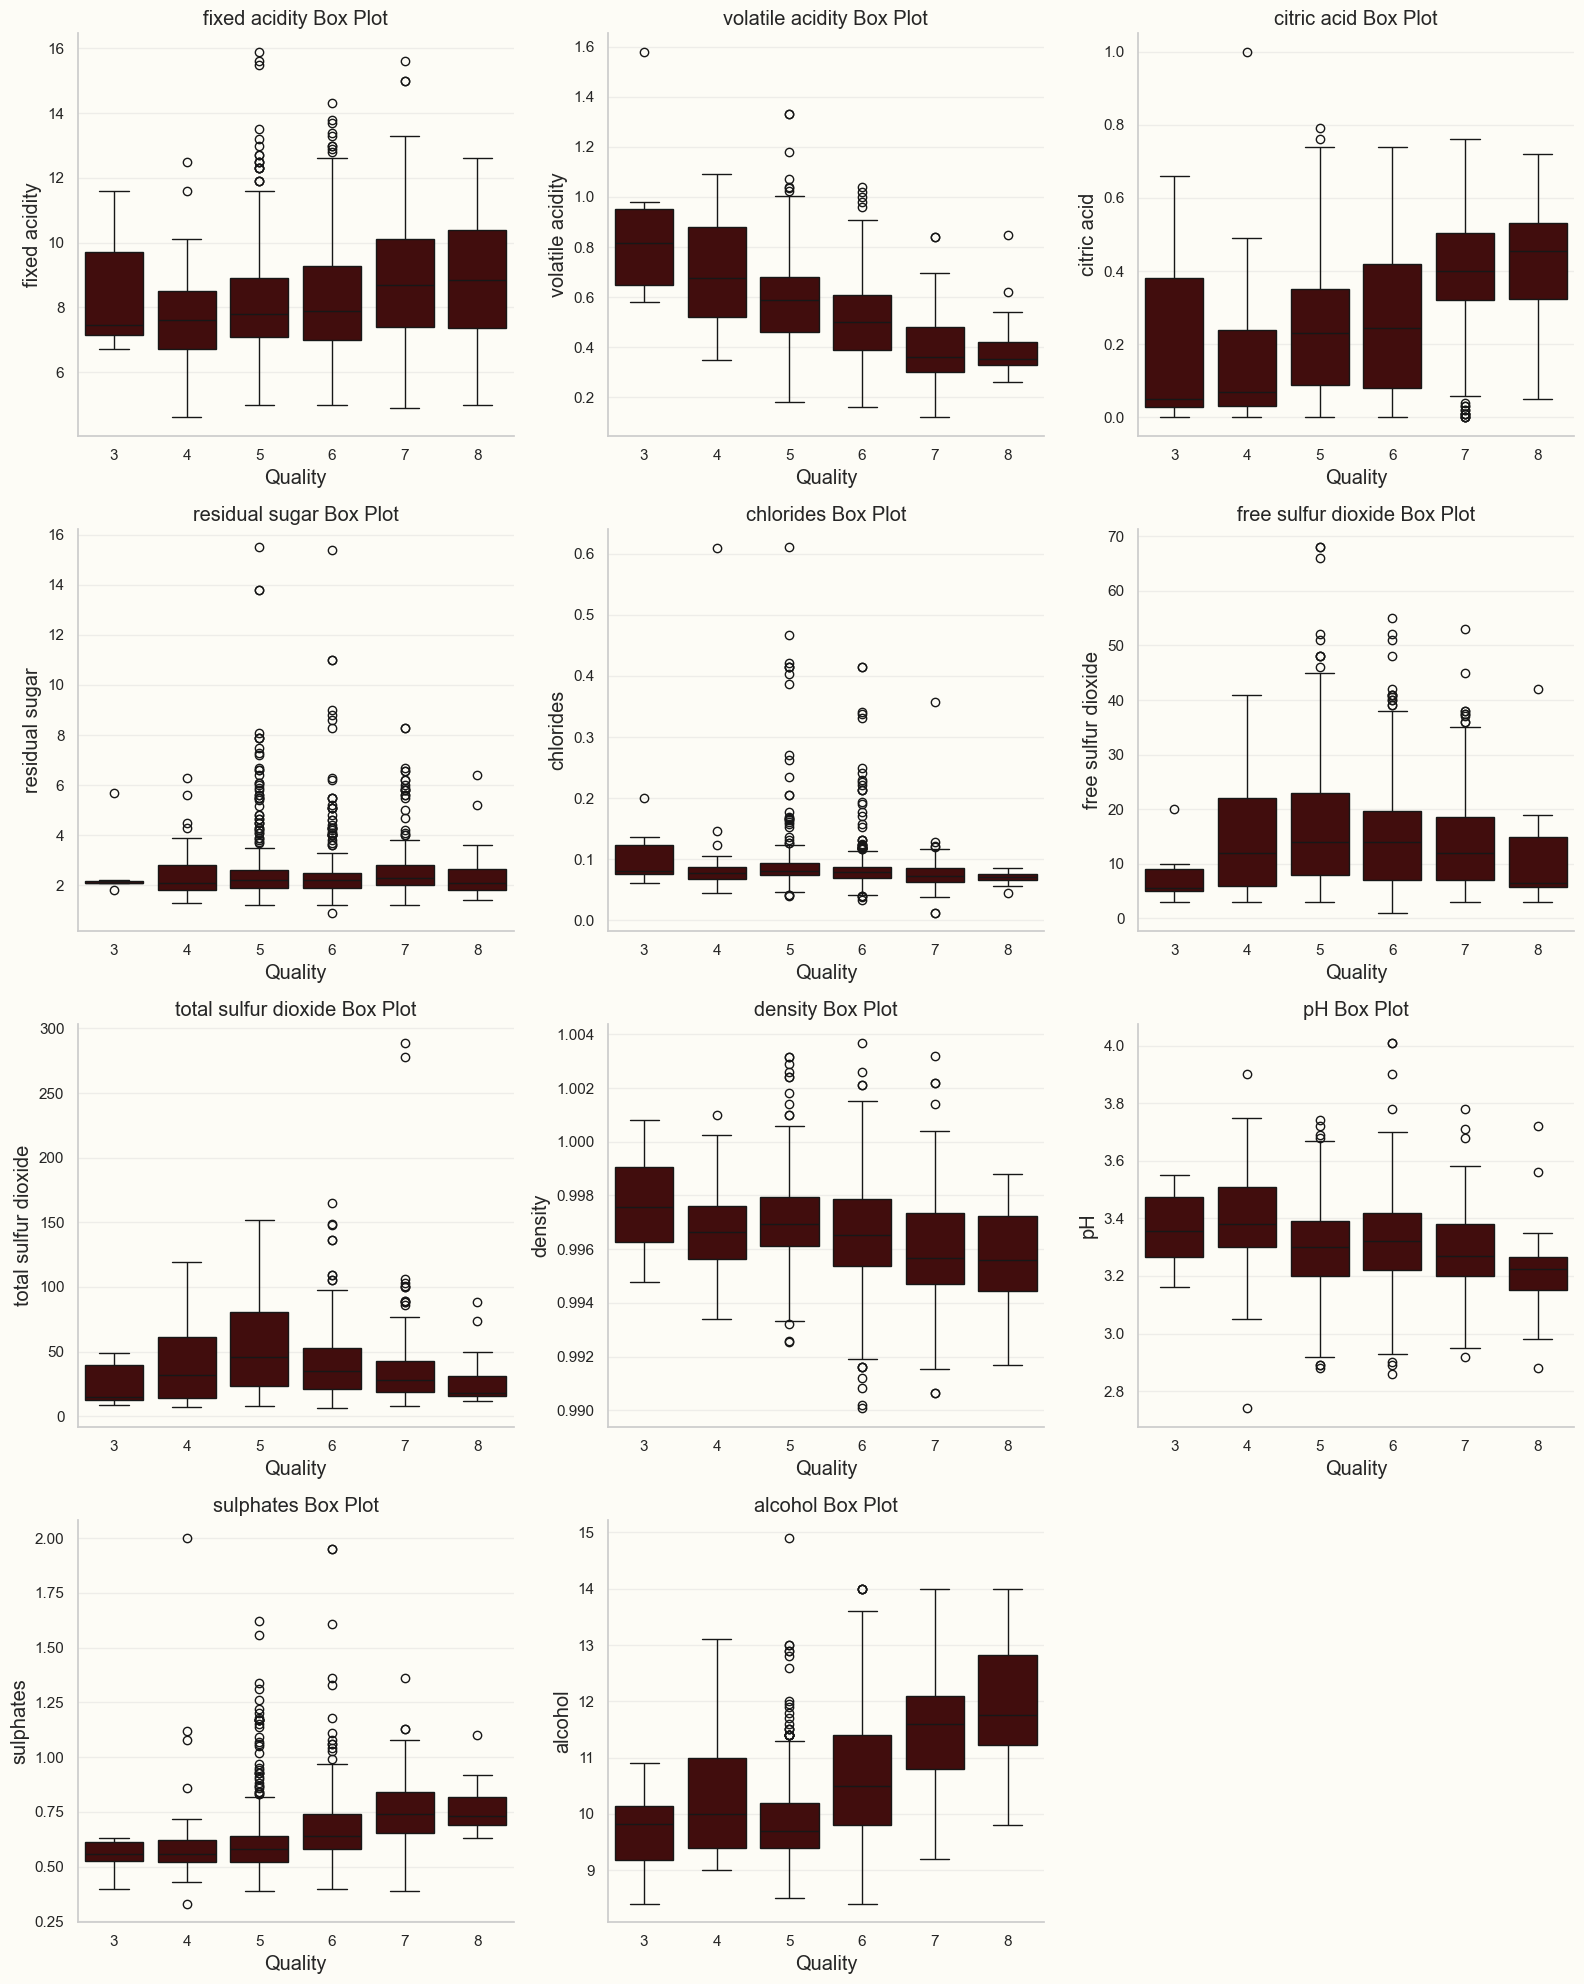

In [10]:
# Get feature columns (excluding 'quality' and 'Id')
features = [col for col in df.columns if col not in ['quality', 'Id']]

# Calculate layout
n_cols = 3
n_rows = math.ceil(len(features)/n_cols)

# Create subplots
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*5))
ax = ax.flatten()

# Create box plots
for i, feature in enumerate(features):
    sns.boxplot(
        y=df[feature],
        x=df.quality,
        ax=ax[i],
    )
    
    # Customize titles and labels
    ax[i].set_title(f'{feature} Box Plot')
    ax[i].set_xlabel('Quality')

# Turn off any empty subplots
for i in range(len(features), len(ax)):
    ax[i].axis('off')

plt.tight_layout()
plt.show()

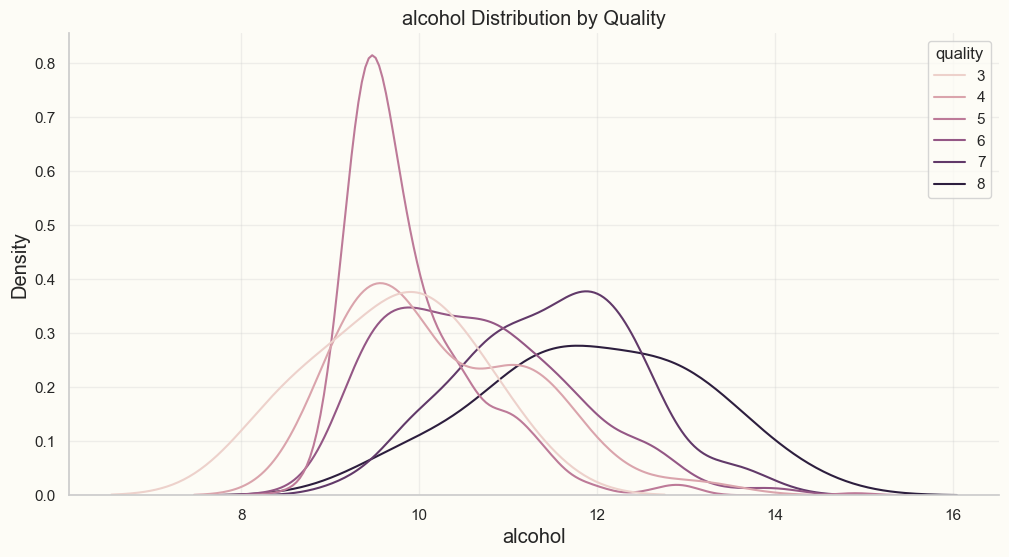

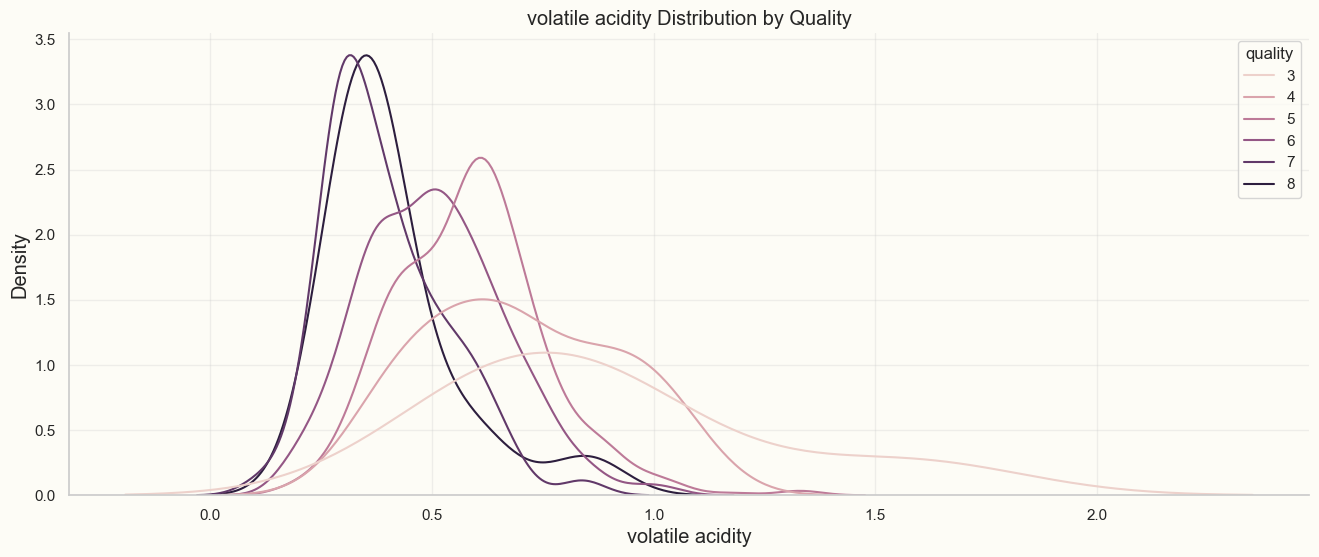

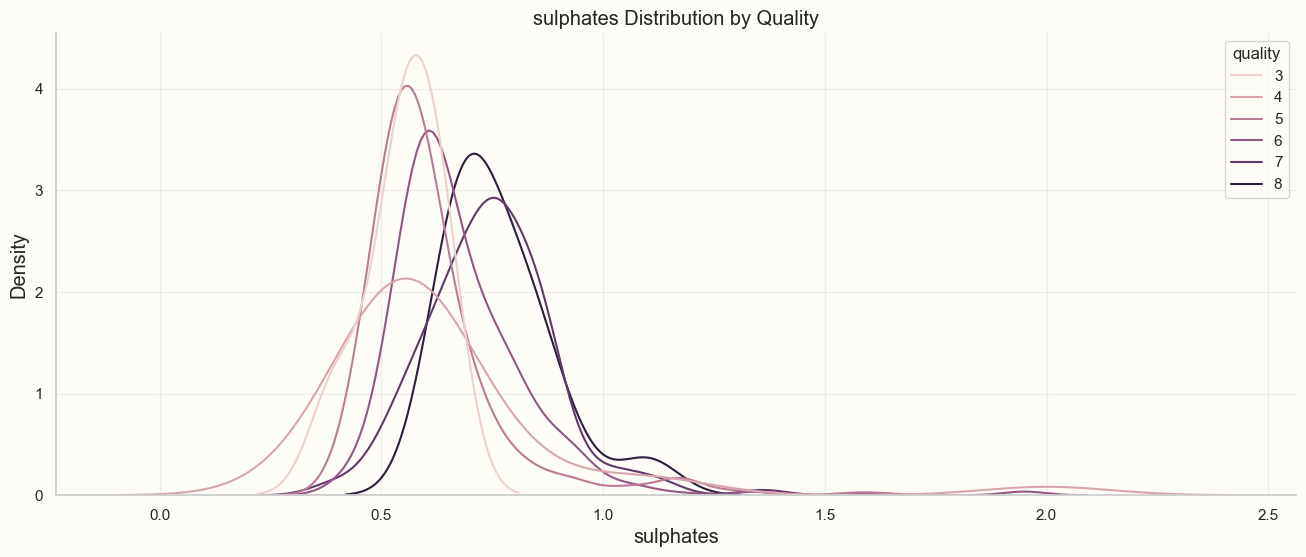

In [11]:
# KDE plots for quality levels
plt.figure(figsize=(12, 6))
for col in ['alcohol', 'volatile acidity', 'sulphates']:
    sns.kdeplot(data=df, x=col, hue='quality', common_norm=False)
    plt.title(f'{col} Distribution by Quality')
    plt.show()

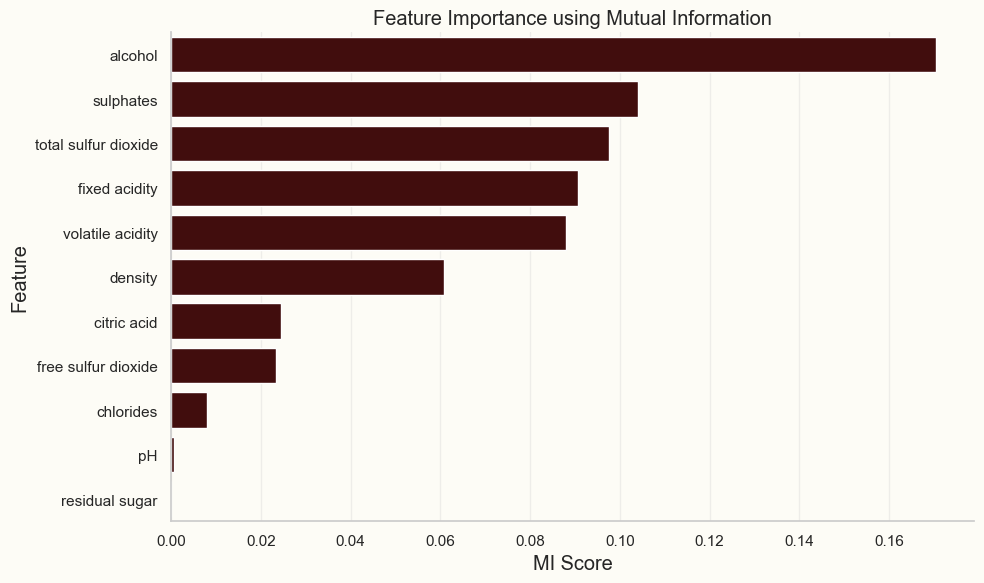

In [12]:
# Feature importance using mutual information
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(X_scaled, df['quality'])
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values('MI Score', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=mi_df, x='MI Score', y='Feature')
plt.title('Feature Importance using Mutual Information')
plt.tight_layout()

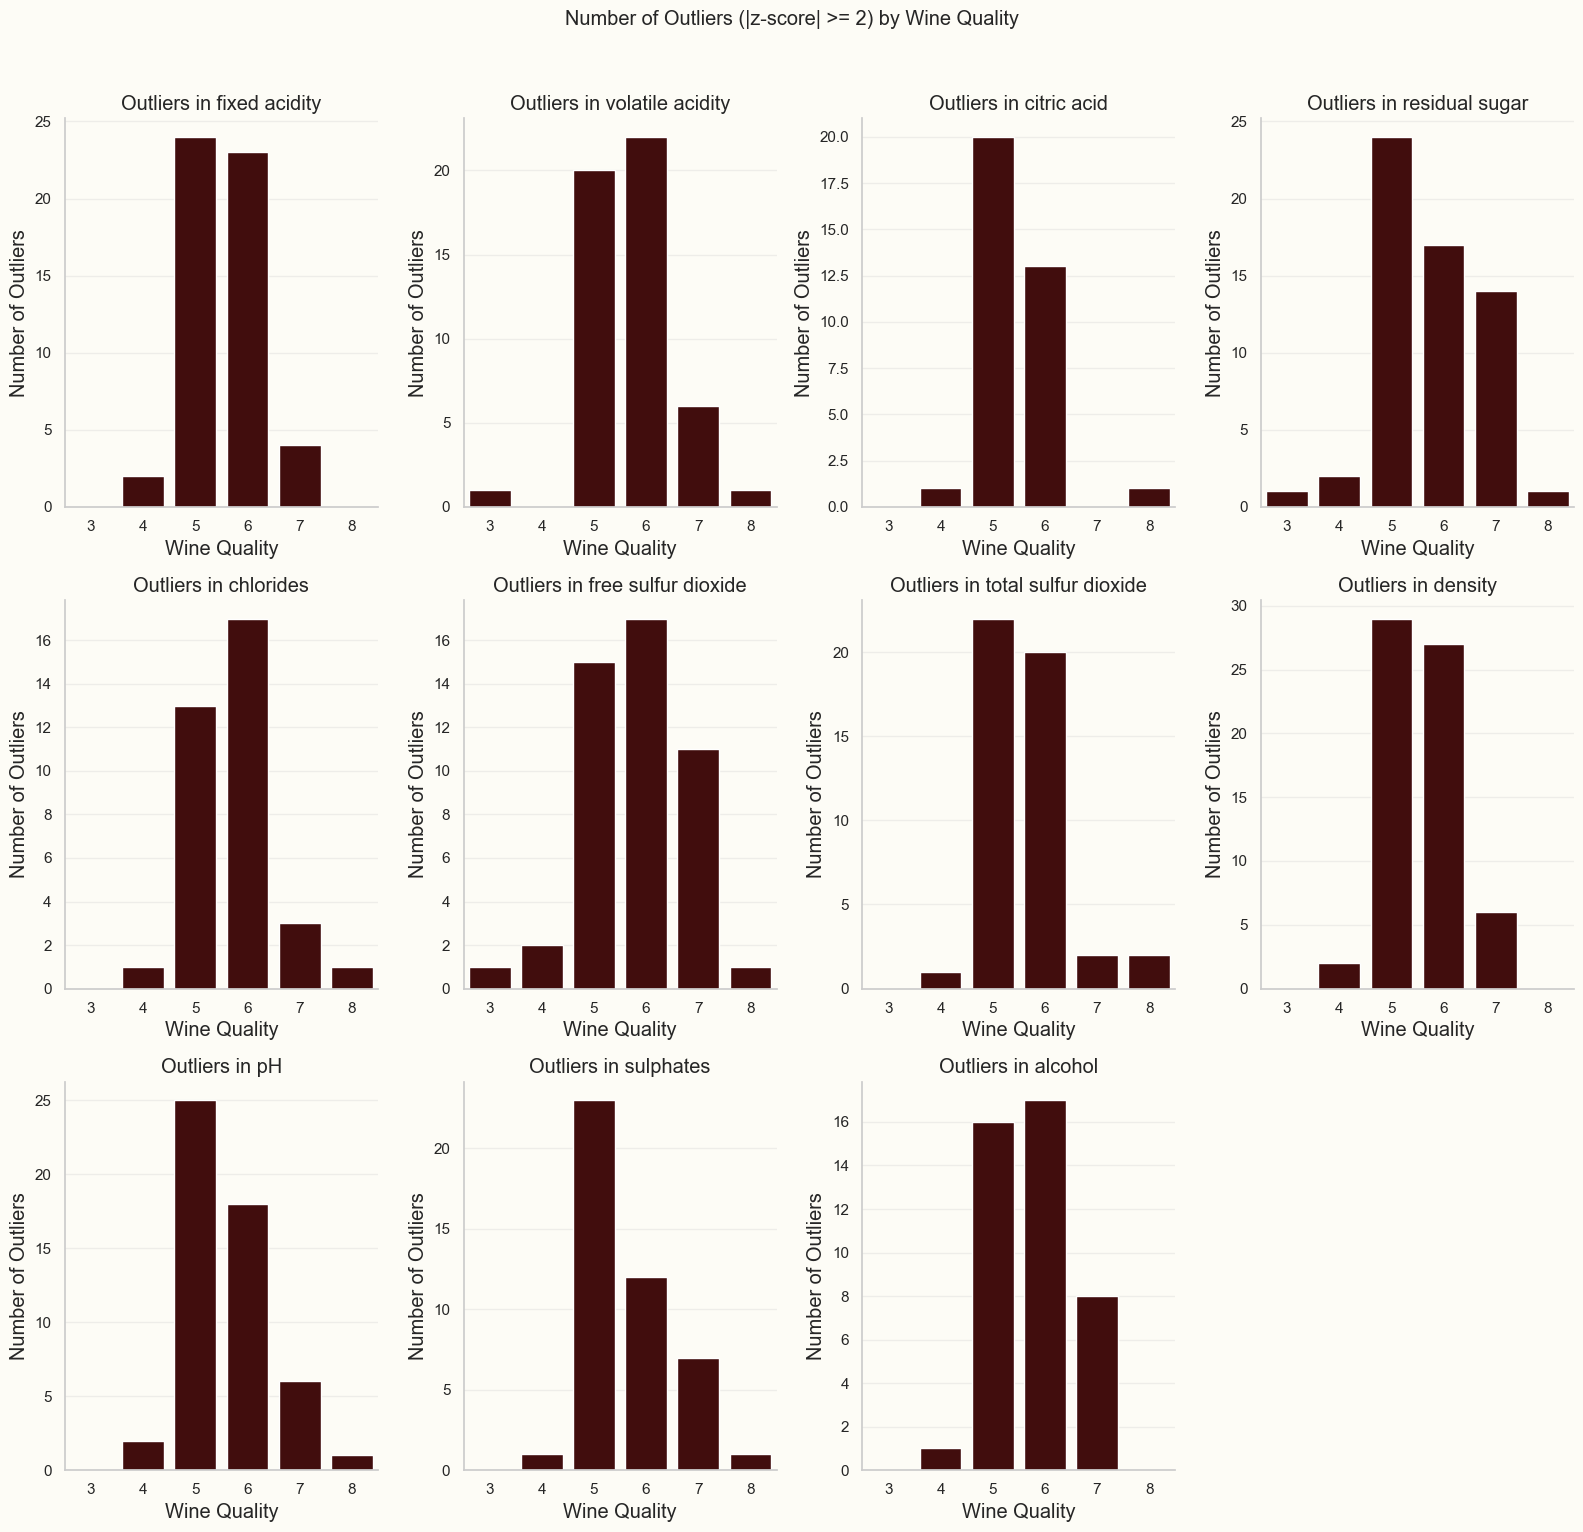

In [13]:
# Define features (excluding quality and Id)
features = [col for col in df.columns if col not in ['quality', 'Id']]

# Let's check the grouping and z-score calculation differently
# Instead of using apply, let's do it manually for each group
z_scores = pd.DataFrame()

for quality in df.quality.unique():
    group = df[df.quality == quality]
    z_group = pd.DataFrame(zscore(group[features]), columns=features)
    z_group['quality'] = quality
    z_scores = pd.concat([z_scores, z_group])

# Now count outliers per quality level
outliers = (z_scores.abs() >= 2).groupby(z_scores.quality).sum()

# Create plot
n_cols = 4
n_rows = math.ceil(len(features)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*5))
ax = ax.flatten()

# Plot outliers count for each feature
for i, feature in enumerate(features):
    sns.barplot(x=outliers.index, y=outliers[feature], ax=ax[i])
    ax[i].set_ylabel('Number of Outliers')
    ax[i].set_title(f'Outliers in {feature}')
    ax[i].set_xlabel('Wine Quality')
    
# Turn off empty subplots
for i in range(len(features), len(ax)):
    ax[i].axis('off')

plt.suptitle('Number of Outliers (|z-score| >= 2) by Wine Quality', y=1.02)
plt.tight_layout()
plt.show()

## Outlier Analysis by Wine Quality

Analysis of z-score based outliers (|z-score| ≥ 2) reveals key insights about our wine quality dataset:

### Dataset Distribution
- Strong imbalance in quality ratings:
  - Quality 5-6: Majority of samples (483 and 462)
  - Quality 3-4: Very few samples (6 and 33)
  - Quality 7: Moderate representation (143 samples)

### Chemical Property Patterns
- Density and pH show the highest number of outliers across quality levels
  - Density: 29 outliers in quality 5, 27 in quality 6
  - pH: 25 outliers in quality 5, 18 in quality 6
- Medium quality wines (5-6) demonstrate the most chemical variability
- Higher quality wines show more consistency, with fewer outliers
- Citric acid shows an interesting pattern:
  - 20 outliers in quality 5 wines
  - Decreases to 0 outliers in quality 7 wines
  - Suggests more standardized citric acid levels in higher quality wines

### Implications
- The relationship between chemical properties and wine quality isn't strictly linear
- Medium quality wines show greater chemical variation than either low or high quality wines
- Higher quality wines tend to have more consistent chemical profiles
- Low quality wine outlier patterns are harder to interpret due to small sample sizes
```

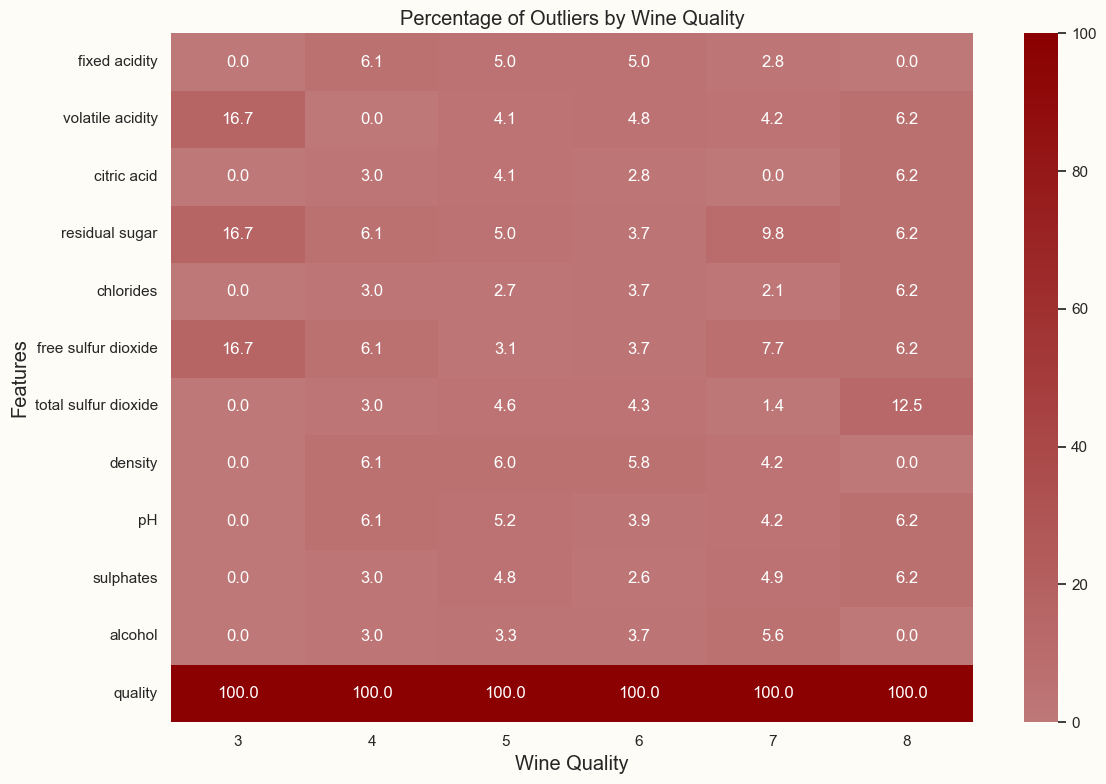

In [14]:
# Get sample sizes per quality
quality_counts = df.quality.value_counts().sort_index()

# Normalize outliers by sample size (convert to percentages)
normalized_outliers = outliers.div(quality_counts, axis=0) * 100

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(normalized_outliers.T, 
            annot=True, 
            fmt='.1f',
            cmap=wine_light_cmap,
            center=0)
plt.title('Percentage of Outliers by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

Variance Inflation Factors (VIF):


,Feature,VIF
7,density,1435.099175
8,pH,1043.339933
10,alcohol,123.962480
0,fixed acidity,74.548916
9,sulphates,21.510809
1,volatile acidity,17.040785
2,citric acid,9.219394
4,chlorides,6.717067
5,free sulfur dioxide,6.298331
6,total sulfur dioxide,6.224163


C:\Users\BobThomas\AppData\Local\Temp\ipykernel_117296\2189717060.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="VIF", y="Feature", data=vif_data, palette=palette)


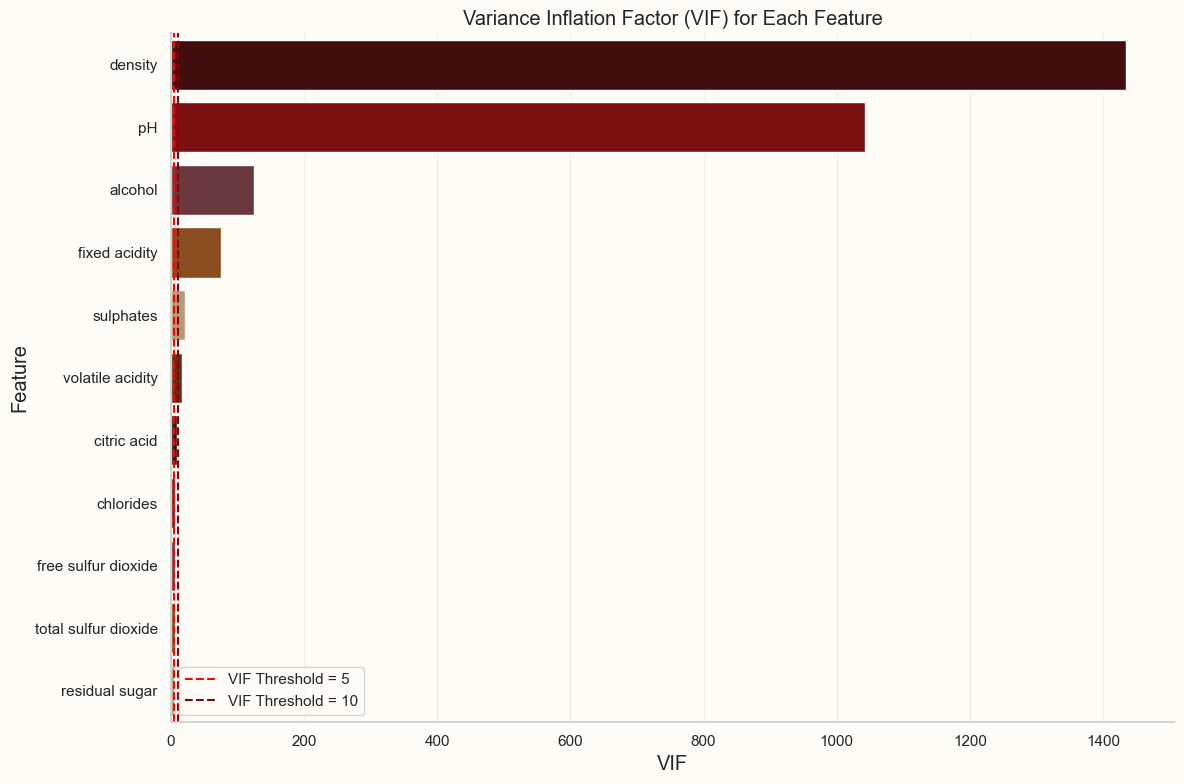

In [15]:
#correlation analysis

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame with just the feature variables (excluding quality and Id)
X = df.drop(['quality', 'Id'], axis=1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort the DataFrame by VIF values
vif_data = vif_data.sort_values("VIF", ascending=False)

# Display VIF values
print("Variance Inflation Factors (VIF):")
display(vif_data)

# Create a bar plot of VIF values
plt.figure(figsize=(12, 8))
sns.barplot(x="VIF", y="Feature", data=vif_data, palette=palette)
plt.title("Variance Inflation Factor (VIF) for Each Feature")
plt.axvline(x=5, color='r', linestyle='--', label='VIF Threshold = 5')
plt.axvline(x=10, color='darkred', linestyle='--', label='VIF Threshold = 10')
plt.legend()
plt.tight_layout()
plt.show()

## Note on Density's Extreme Multicollinearity

The Variance Inflation Factor (VIF) of 1435 for density is very high and reveals a critical insight about this feature in our wine quality dataset.

### Statistical Implications

Near-Perfect Multicollinearity: A VIF of 1435 indicates that the variance of the regression coefficient for density is inflated by a factor of 1435 compared to what it would be if density were completely uncorrelated with other features.

Linear Dependence: Density can be almost perfectly predicted as a linear combination of other features in the dataset.

Coefficient Instability: In regression models, the coefficient for density would be highly unstable - small changes in the data could cause large swings in its estimated effect.

### Chemical Explanation

This extreme multicollinearity makes sense from a chemical perspective:

Density is a Derived Property: In wine, density is directly determined by the concentration of dissolved compounds and alcohol content.

Expected Correlations: Strong relationships with fixed acidity, residual sugar, and an inverse relationship with alcohol content are expected based on physical chemistry principles.

***

# Feature Engineering and Selection

## Feature Engineering Rationale

Below, we detail the motivation behind each newly created feature and how it may contribute to predicting wine quality.

### 1. `density_minus_one`
Wine density typically hovers around 1.0 (since water has a density of 1 g/mL). By subtracting 1, we highlight even small deviations above or below this baseline. These deviations can be influenced by alcohol content, sugar levels, and other dissolved solids in the wine. Tracking how much the density diverges from 1.0 may reveal subtle quality indicators related to the wine’s body and composition.

### 2. Log Transformations

#### `log_residual_sugar`, `log_chlorides`, and `log_sulphates`
Some features (like sugar, chlorides, and sulphates) are skewed, based on the previously viewed distribution charts. Applying a log transform (`log1p` in Python, which does \(\log(1 + x)\)) helps stabilize variance and reduce the impact of extreme values (outliers). This often leads to improved model performance because many algorithms (like linear regression and certain tree-based methods) can benefit from features with more normally distributed values.

### 3. `total_acidity_ratio`
Acidity in wine primarily comes from **fixed acidity** (non-volatile acids) and **volatile acidity** (e.g., acetic acid). Summing these gives a measure of total acidity. Dividing this sum by one of the acidity components (in this case, **fixed acidity**) provides a ratio that can capture the balance between different acid types. This balance is crucial to wine’s taste and perceived quality.

### 4. `citric_fixed_ratio`
Citric acid is one of the key acids in wine, but it’s usually present in smaller amounts compared to other acids (like tartaric or malic). The ratio of citric acid to fixed acidity can highlight whether citric acid is contributing significantly to the overall acid profile. Higher or lower relative citric acid levels may impact the wine’s flavor profile and, consequently, its quality rating.

### 5. `so2_ratio`
Sulfur dioxide (SO₂) exists in wine in two forms: **free** and **bound**. The free portion is crucial for inhibiting microbial growth and oxidation, directly affecting wine preservation and taste. By dividing **free sulfur dioxide** by **total sulfur dioxide**, we see what fraction of the SO₂ is “active” (free). Wines with too little free SO₂ risk spoilage, while too much can lead to off-flavors or undesirable chemical profiles. Thus, the `so2_ratio` can be a strong indicator of overall wine quality and stability.

These features are added to the dataframe below:



In [16]:
# Referring back to the original dataFrame as df

# 1. Density minus 1
df['density_minus_one'] = df['density'] - 1.0

# 2. Log transforms (using np.log1p for log(1 + x))
df['log_residual_sugar'] = np.log1p(df['residual sugar'])
df['log_chlorides']      = np.log1p(df['chlorides'])
df['log_sulphates']      = np.log1p(df['sulphates'])

# 3. Total acidity ratio
#    One common approach is to consider total acidity as (fixed + volatile) 
#    and then create a ratio relative to one of the acids. 
#    Below is an example: total acidity / fixed acidity
df['total_acidity_ratio'] = (
    (df['fixed acidity'] + df['volatile acidity']) 
    / (df['fixed acidity'] + 1e-6)
)

# 4. Citric to fixed acidity ratio
df['citric_fixed_ratio'] = df['citric acid'] / (df['fixed acidity'] + 1e-6)

# 5. SO2 ratio (free SO2 / total SO2)
df['so2_ratio'] = df['free sulfur dioxide'] / (df['total sulfur dioxide'] + 1e-6)

# Adding a check to see the new columns have been added
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,density_minus_one,log_residual_sugar,log_chlorides,log_sulphates,total_acidity_ratio,citric_fixed_ratio,so2_ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,-0.0022,1.064711,0.073250,0.444686,1.094594,0.000000,0.323529
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,-0.0032,1.280934,0.093490,0.518794,1.112820,0.000000,0.373134
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,-0.0030,1.193922,0.088011,0.500775,1.097436,0.005128,0.277778
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3,-0.0020,1.064711,0.072321,0.457425,1.025000,0.050000,0.283333
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4,-0.0022,1.064711,0.073250,0.444686,1.094594,0.000000,0.323529


In [17]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix to the console
print(corr_matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.250728     0.673157   
volatile acidity          -0.250728          1.000000    -0.544187   
citric acid                0.673157         -0.544187     1.000000   
residual sugar             0.171831         -0.005751     0.175815   
chlorides                  0.107889          0.056336     0.245312   
free sulfur dioxide       -0.164831         -0.001962    -0.057589   
total sulfur dioxide      -0.110628          0.077748     0.036871   
density                    0.681501          0.016512     0.375243   
pH                        -0.685163          0.221492    -0.546339   
sulphates                  0.174592         -0.276079     0.331232   
alcohol                   -0.075055         -0.203909     0.106250   
quality                    0.121970         -0.407394     0.240821   
Id                        -0.275826         -0.007892    -0.139011   
density_minus_one   

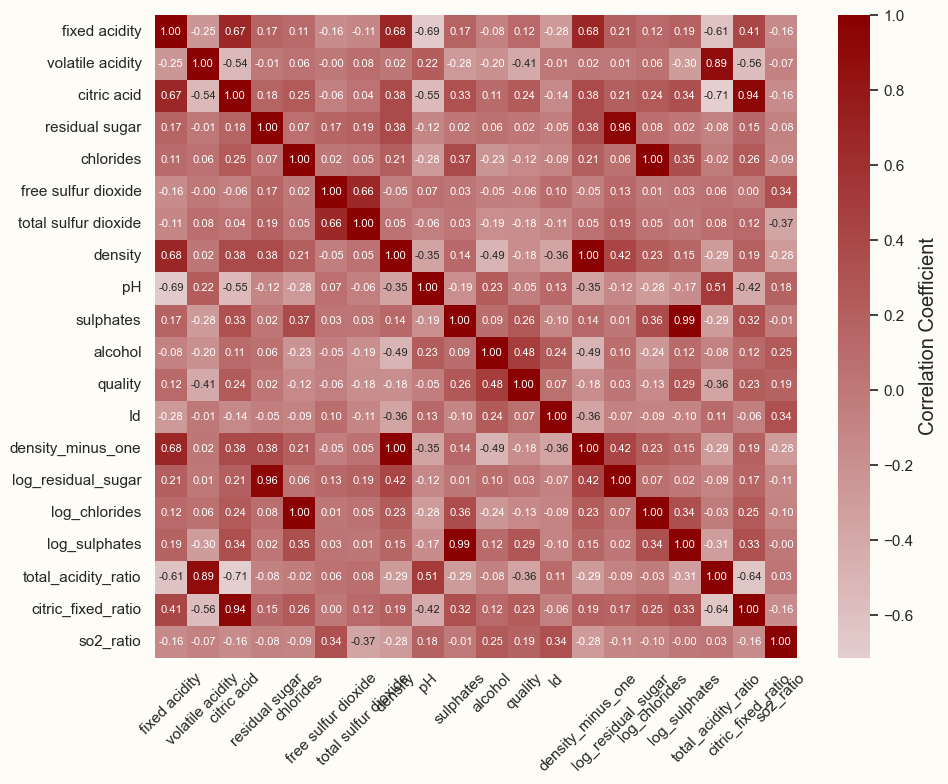

In [18]:
plt.figure(figsize=(10, 8), facecolor=bg_color)
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, 
            annot=True,
            cmap=wine_light_cmap,
            fmt='.2f',
            annot_kws={'size': 8},
            center=0,
            cbar_kws={'label': 'Correlation Coefficient'},
            square=True)

plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [19]:
# Calculate the correlation of each feature with the target variable 'quality'
target_corr = correlation_matrix['quality'].drop('quality')

# Sort by absolute correlation in descending order
sorted_features = target_corr.abs().sort_values(ascending=False)

print("Features ranked by absolute correlation with quality:")
print(sorted_features)

Features ranked by absolute correlation with quality:
alcohol                 0.484866
volatile acidity        0.407394
total_acidity_ratio     0.358429
log_sulphates           0.287625
sulphates               0.257710
citric acid             0.240821
citric_fixed_ratio      0.228415
so2_ratio               0.186621
total sulfur dioxide    0.183339
density                 0.175208
density_minus_one       0.175208
log_chlorides           0.130136
chlorides               0.124085
fixed acidity           0.121970
Id                      0.069708
free sulfur dioxide     0.063260
pH                      0.052453
log_residual_sugar      0.030566
residual sugar          0.022002
Name: quality, dtype: float64


## Summary of Correlation Analysis

Below is a summary of the key findings from the correlation matrix analysis for the wine dataset:

- **Acidity Measures:**
  - **Fixed Acidity & Citric Acid:**  
    Fixed acidity is strongly positively correlated with citric acid (r ≈ 0.67), indicating that wines with higher fixed acidity tend to have higher levels of citric acid.
  - **Volatile Acidity & Citric Acid:**  
    There is a moderate negative correlation (r ≈ -0.54) between volatile acidity and citric acid, suggesting that as volatile acidity increases, citric acid tends to decrease.
  - **pH & Fixed Acidity:**  
    pH is strongly negatively correlated with fixed acidity (r ≈ -0.69), which is expected because higher acidity results in lower pH values.

- **Sugar and Density:**
  - **Residual Sugar:**  
    Residual sugar has relatively low correlations with other features. However, its log-transformed version (Log Residual Sugar) shows a very strong relationship with itself (r ≈ 0.96), confirming that the transformation preserves its structure.
  - **Density:**  
    Density is strongly correlated with fixed acidity (r ≈ 0.68). Note that **density** and **density_minus_one** are perfectly correlated, as they differ only by a constant.

- **Sulfur Dioxide Measurements:**
  - **Free and Total Sulfur Dioxide:**  
    Free sulfur dioxide shows moderate correlations with total sulfur dioxide and some other features, suggesting that while these measures are related, their relationships with overall wine quality are complex.

- **Quality and Derived Features:**
  - **Wine Quality:**  
    Quality has a modest negative correlation with volatile acidity (r ≈ -0.41), which supports the idea that higher volatile acidity (often associated with off-flavors) is linked to lower quality.
  - **Alcohol:**  
    Alcohol content shows a moderate positive correlation with quality (in some parts of the matrix, up to r ≈ 0.48), indicating that higher alcohol levels are generally associated with better quality wines.
  - **Engineered Ratios:**  
    - **Total Acidity Ratio:** Shows strong negative relationships with other acidity measures, hinting that it may capture the balance between different types of acids.
    - **Citric_fixed_ratio:** Exhibits an extremely high positive correlation with citric acid (r ≈ 0.94), demonstrating that this engineered feature is largely driven by citric acid levels.

- **Log Transformations:**
  - The log-transformed variables (e.g., Log Residual Sugar, Log Chlorides, Log Sulphates) maintain similar patterns to their original forms but can help reduce the impact of extreme values.

- **Redundancy and Multicollinearity:**
  - Variables like **density** and **density_minus_one** are perfectly correlated, indicating redundancy. Such redundant features can be candidates for removal to avoid multicollinearity in modeling.

Overall, the correlation analysis provides critical insights into the relationships among the features. These insights guide feature engineering, inform model selection, and help in refining predictive models for wine quality.


***

# Model Development and Training

## Model 1: Multiple Linear Regression (OLS)



In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Define the list of features to use for training
# Adjust the list below to include only the features you wish to use.
feature_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 
                'residual sugar', 'chlorides', 'free sulfur dioxide', 
                'total sulfur dioxide', 'density', 'pH', 'sulphates', 
                'alcohol', 'density_minus_one', 'log_residual_sugar', 
                'log_chlorides', 'log_sulphates', 'total_acidity_ratio', 
                'citric_fixed_ratio', 'so2_ratio']

# Create X and y datasets
X = df[feature_cols]
y = df['quality']

# Split the data into training and testing sets (e.g., 80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Initialize and train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error (MSE) and R²
mse_reg = mean_squared_error(y_test, y_pred)
r2_reg = r2_score(y_test, y_pred)

# Make sure to add a constant to capture the intercept
X_with_const = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X_with_const).fit()

# Print the OLS regression results summary at the end of your output
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     44.01
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          9.48e-112
Time:                        17:49:27   Log-Likelihood:                -1083.2
No. Observations:                1143   AIC:                             2202.
Df Residuals:                    1125   BIC:                             2293.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   17.6573 

## Interpretation of OLS Regression Results

### Overall Model Fit
- **Dependent Variable:** The model predicts `quality`.
- **R-squared:** 0.399 indicates that approximately 40% of the variability in wine quality is explained by the predictors in this model.
- **Adjusted R-squared:** 0.390, which is slightly lower than R-squared after accounting for the number of predictors.
- **F-statistic and Prob (F-statistic):** The F-statistic of 44.01 with a highly significant p-value (9.48e-112) suggests that, overall, the model is statistically significant and that at least one predictor is related to wine quality.

### Coefficient Interpretations
- **Intercept (const):** 17.6573  
  This is the estimated quality when all predictors are 0. While this value may not be meaningful on its own (since predictors like acidity or alcohol cannot be 0 in practice), it sets the baseline for the model.
  
- **pH:**  
  The coefficient of -0.5455 (p = 0.024) indicates that, holding all else constant, a one-unit increase in pH is associated with a decrease in wine quality by about 0.55 units. This relationship is statistically significant.

- **Sulphates:**  
  The coefficient of -6.1163 (p < 0.001) suggests that higher sulphates are associated with lower quality scores. This is statistically significant and may indicate that beyond a certain point, sulphate levels adversely affect quality.

- **Alcohol:**  
  With a coefficient of 0.2557 (p < 0.001), higher alcohol content is significantly associated with higher wine quality. Each percentage point increase in alcohol is predicted to increase quality by about 0.26 units.

- **log_sulphates:**  
  A positive coefficient of 12.8183 (p < 0.001) implies that when sulphates are log-transformed, their association with quality is strongly positive. This may highlight a non-linear relationship where changes in sulphates at lower levels have a different effect than at higher levels.

- **Other Predictors:**  
  Many other variables (e.g., `fixed acidity`, `volatile acidity`, `citric acid`, `residual sugar`, etc.) have coefficients that are not statistically significant at conventional levels (p > 0.05), suggesting they might have a weaker or no clear linear relationship with quality in this model.

- **so2_ratio:**  
  The coefficient of 0.4857 (p = 0.052) is marginally significant, implying that a higher ratio of free to total sulfur dioxide may be associated with higher quality, but this result should be interpreted with caution.

### Model Diagnostics and Potential Issues
- **Multicollinearity:**  
  The condition number (Cond. No.) is extremely high (3.18e+18), which may indicate severe multicollinearity or a singular design matrix. This could affect the stability and reliability of the coefficient estimates.
  
### Summary
The model explains about 40% of the variance in wine quality, with significant predictors including pH, sulphates (both in raw and log-transformed form), and alcohol. However, multicollinearity and non-normality in the residuals may warrant further investigation or model refinement. Alternative modeling strategies (e.g., regularization, transformation of predictors, or non-linear models) might help in addressing these issues and improving predictive performance.


## Model 2: K-Nearest Neighbours (KNN)

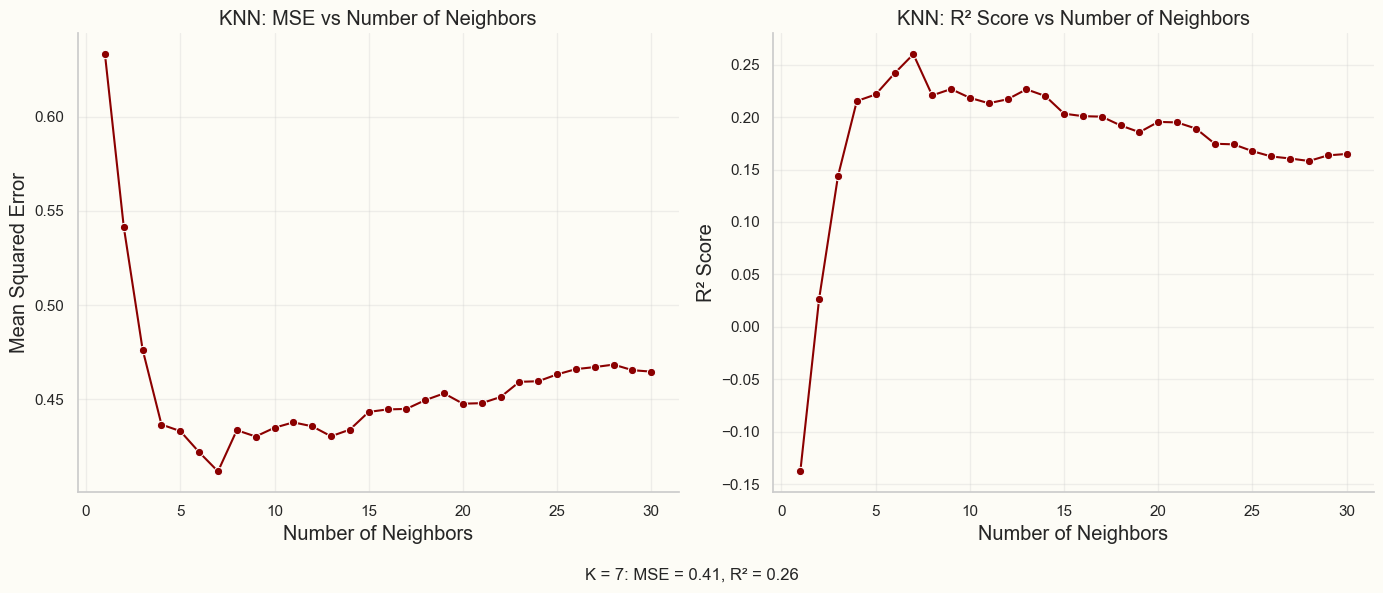

<Figure size 1600x600 with 0 Axes>

In [21]:
# Range of neighbor values to try
neighbor_values = range(1, 31)

mse_values = []
r2_values = []

# Loop over different numbers of neighbors
for k in neighbor_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse_values.append(mean_squared_error(y_test, y_pred))
    r2_values.append(r2_score(y_test, y_pred))

# Calculate performance for K=7 specifically
k_optimal = 7
knn_opt = KNeighborsRegressor(n_neighbors=k_optimal)
knn_opt.fit(X_train, y_train)
y_pred_k7 = knn_opt.predict(X_test)
mse_k7 = mean_squared_error(y_test, y_pred_k7)
r2_k7 = r2_score(y_test, y_pred_k7)

# Create plots
plt.figure(figsize=(14, 6))

# MSE Plot
plt.subplot(1, 2, 1)
sns.lineplot(x=list(neighbor_values), y=mse_values, marker="o", color='#8b0000')
plt.title('KNN: MSE vs Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Squared Error')

# R² Plot
plt.subplot(1, 2, 2)
sns.lineplot(x=list(neighbor_values), y=r2_values, marker="o", color='#8b0000')
plt.title('KNN: R² Score vs Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('R² Score')

# Add annotation with K=7 metrics below the plots
annotation_text = f"K = {k_optimal}: MSE = {mse_k7:.2f}, R² = {r2_k7:.2f}"
plt.gcf().text(0.5, 0.02, annotation_text, ha='center', fontsize=12)

# Adjust layout to leave space for the annotation
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

plt.tight_layout()
plt.show()

## Selecting a K value for KNN

**K** in the K-Nearest Neighbors (KNN) algorithm represents the number of neighbors the model considers when predicting a value. 

In other words, to predict the target for a new data point, KNN looks at the *K* closest points in the training set (based on a chosen distance metric, like Euclidean distance) and typically takes the average of their target values (in regression tasks).

### Why Does the Choice of K Matter?
- **Small K (e.g., K=1):**  
  - **Overfitting Risk**: The model may be overly sensitive to local variations or outliers in the training data.  
  - **High Variance**: Predictions can change drastically if a single neighbor changes.  
- **Large K:**  
  - **Underfitting Risk**: The model may become too generalized, smoothing out important local patterns.  
  - **High Bias**: Subtle differences in the data may be lost, leading to less accurate predictions.

### Interpreting the Trends
1. **MSE Curve**:  
   - Starts high for very small K, drops to a minimum (often around a mid-range K), then begins to rise again for very large K.  
   - Reflects the trade-off between fitting closely to training points (low K) and averaging across many points (high K).
2. **R² Score Curve**:  
   - Often negative at K=1 (worse than a naive mean-based prediction), then improves as K increases, peaking around the same region where MSE is minimized, and finally declines if K becomes too large.  
   - Demonstrates how model performance improves up to an optimal point before excessive averaging dilutes predictive power.

By selecting a K near the point where MSE is minimized and R² is maximized, one typically finds the best balance between bias and variance for the dataset.

**Optimal K Value: 7**

From the plots comparing different values of K in K-Nearest Neighbors (KNN), we see that **K=7** yields the lowest Mean Squared Error (MSE) and the highest R² score. 

This suggests that using 7 neighbors provides the best balance between underfitting (too large K) and overfitting (too small K) for this dataset.



## Model 3: Random Forest

Random Forest Regression Performance:
Mean Squared Error: 0.30
R² Score: 0.46


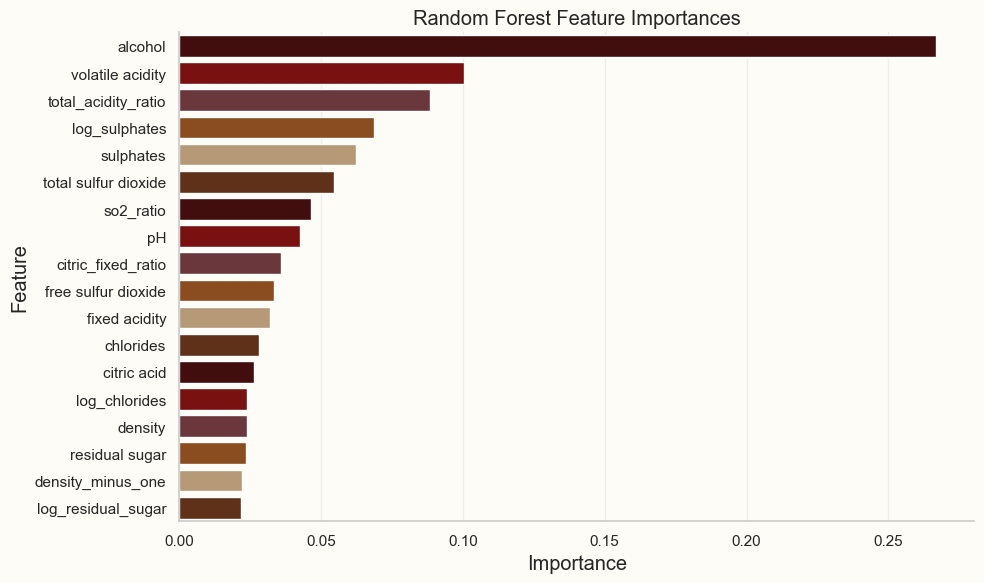

In [22]:
# Initialize the Random Forest Regressor with 100 trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model's performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Performance:")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")

# Optional: Visualize the feature importance
plt.figure(figsize=(10, 6))
importances = rf.feature_importances_
indices = importances.argsort()[::-1]

# Create a list of feature names corresponding to the sorted importances
feature_names = [X.columns[i] for i in indices]

sns.barplot(x=importances[indices], y=[X.columns[i] for i in indices], hue=feature_names, palette=palette,)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Additional Random Forest Model Statistics and Hyperparameter Tuning

The initial performance of our Random Forest model (MSE: 0.30, R²: 0.46) provides a good baseline. However, to better understand the model and potentially improve its performance, consider the following steps:

1. **Hyperparameter Tuning:**  
   - Use `GridSearchCV` to test different combinations of hyperparameters (e.g., number of trees, maximum tree depth, minimum samples to split or leaf).
   - Evaluate performance using cross-validation (e.g., 5-fold CV) with Mean Squared Error as the scoring metric.
   - Identify the best combination of hyperparameters that minimizes the MSE.

2. **Additional Metrics and Diagnostics:**  
   - **Feature Importances:** Continue visualizing which features are most influential in the model.
   - **Out-of-Bag (OOB) Error:** If you enable `oob_score=True` in your Random Forest, you can use the OOB score as an additional measure of model performance.
   - **Residual Analysis:** Plotting residuals or using diagnostic plots can help assess whether the model assumptions are met and if there are patterns left unexplained.

3. **Visualization of Hyperparameter Effects:**  
   - You can also visualize how performance metrics change with different hyperparameters (e.g., using line plots or heatmaps) to better understand their impact on model performance.

The code above uses `GridSearchCV` to perform hyperparameter tuning for our Random Forest model. It reports the best parameters found during cross-validation along with the corresponding Mean Squared Error, and then evaluates the optimized model on the test set.


In [23]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Setup GridSearchCV with 5-fold cross-validation and MSE as the scoring metric
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,
                           verbose=1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Extract the best parameters and best score
best_params = grid_search.best_params_
best_mse = -grid_search.best_score_  # since scoring returns negative MSE

print("Best Hyperparameters:")
print(best_params)
print(f"Best CV Mean Squared Error: {best_mse:.2f}")

# Use the best estimator to predict on the test set
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print("\nPerformance of Best Random Forest Model on Test Set:")
print(f"Mean Squared Error: {mse_best_rf:.2f}")
print(f"R² Score: {r2_best_rf:.2f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Mean Squared Error: 0.38

Performance of Best Random Forest Model on Test Set:
Mean Squared Error: 0.30
R² Score: 0.46


## Random Forest Hyperparameter Tuning Results

After testing 108 candidate parameter combinations (totaling 540 fits using 5-fold cross-validation), the best hyperparameters were determined to be:

- **n_estimators:** 200  
  *(The number of trees in the forest. More trees can improve performance but also increase computation.)*

- **max_depth:** 20  
  *(The maximum depth of each tree. This controls how deep the trees are allowed to grow. Deeper trees can capture more complex patterns but may overfit.)*

- **min_samples_split:** 2  
  *(The minimum number of samples required to split an internal node. Lower values can lead to more complex trees.)*

- **min_samples_leaf:** 1  
  *(The minimum number of samples required to be at a leaf node. Smaller values allow the model to capture finer patterns but may also capture noise.)*

## Model Evaluation

Based on the tuning results and evaluation metrics:

- **Cross-Validated MSE:** 0.38  
  This indicates that, on average, the squared difference between the predicted and actual wine quality scores during cross-validation is 0.38.

- **Test Set MSE:** 0.30  
  A lower MSE on the test set (0.30) suggests that the model makes relatively small average errors when predicting wine quality.

- **R² Score:** 0.46  
  The R² score of 0.46 means that approximately 46% of the variance in wine quality is explained by the model. This indicates a moderate level of predictive power.

### Evaluation Summary

- **Strengths:**  
  - The model shows low error (MSE = 0.30) on unseen data, implying that predictions are generally close to the actual values.
  - An R² of 0.46 suggests that the model is capturing nearly half of the variability in wine quality, which is a decent result given the complexity and noise often present in real-world data.

- **Areas for Improvement:**  
  - With an R² below 0.5, there is room for improvement. The model may benefit from additional feature engineering, incorporating more predictive variables, or exploring alternative models.
  - Further hyperparameter tuning or ensemble methods could help in capturing more variance in wine quality.

Overall, the tuned Random Forest model demonstrates a balanced performance, achieving low test error and a moderate level of explained variance. While the model provides useful predictions, further improvements might be possible with additional data or model refinement.



## Model 4: Support Vector Regression (SVR)

SVR Performance:
Mean Squared Error: 0.43
R² Score: 0.24


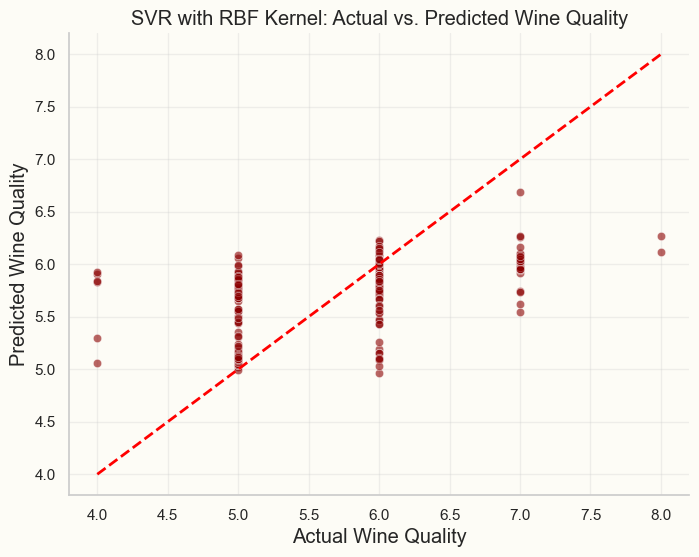

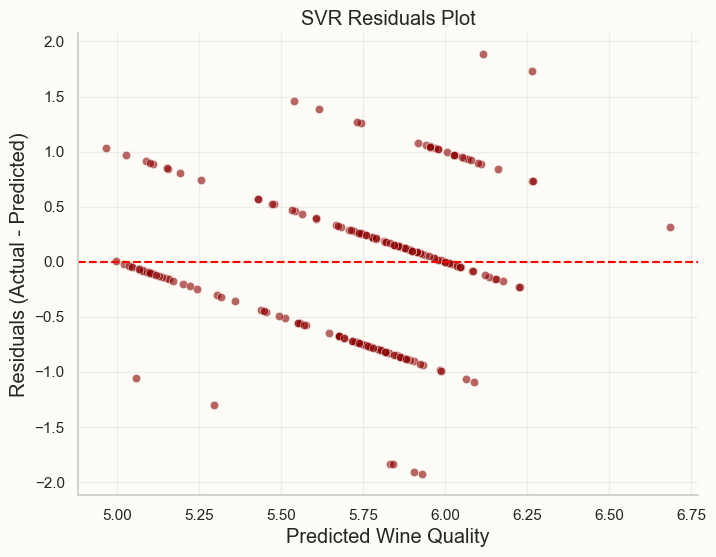

In [24]:
# Initialize the SVR model with an RBF kernel
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svr = svr.predict(X_test)

# Evaluate SVR performance
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("SVR Performance:")
print(f"Mean Squared Error: {mse_svr:.2f}")
print(f"R² Score: {r2_svr:.2f}")

# Plot Predicted vs. Actual Values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_svr, color='#8b0000', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Wine Quality")
plt.ylabel("Predicted Wine Quality")
plt.title("SVR with RBF Kernel: Actual vs. Predicted Wine Quality")
plt.show()

# Plot Residuals
residuals = y_test - y_pred_svr
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred_svr, y=residuals, color='#8b0000', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Wine Quality")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("SVR Residuals Plot")
plt.show()

The above pattern for SVR is a product of the analysis type: specifically where the target is a set of discrete quality labels.

Why does this pattern result?

Actual values are integers: wine quality is typically an integer rating (e.g., 3 to 8). This leads to vertical bands on the x-axis of the “Actual vs. Predicted” plot.
Continuous predictions: SVR outputs continuous values, so the y-axis (predicted quality) is spread out, while the x-axis (actual quality) is “striped” at discrete points.

This is normal for a regression approach on a discrete target.

### Hyperparameter tuning for SVR:

In [25]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for SVR
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'gamma': ['scale', 0.01, 0.1, 1]
}

# Initialize SVR and set up GridSearchCV
svr = SVR(kernel='rbf')
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and score
print("Best Params:", grid_search.best_params_)
print("Best Negative MSE:", grid_search.best_score_)

# Evaluate the best model on the scaled test set
best_svr = grid_search.best_estimator_
y_pred_svr = best_svr.predict(X_test_scaled)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f"\nBest SVR Test Performance:")
print(f"Mean Squared Error: {mse_svr:.2f}")
print(f"R² Score: {r2_svr:.2f}")

Best Params: {'C': 1, 'epsilon': 0.01, 'gamma': 'scale'}
Best Negative MSE: -0.40841361290318623

Best SVR Test Performance:
Mean Squared Error: 0.32
R² Score: 0.42


### SVR tuning detail:

- **Scaling the Data:**  
  We used a standard scaling technique (e.g., StandardScaler) to transform both the training and testing features. This is essential for SVR with an RBF kernel, as the performance of distance-based models is heavily influenced by the scale of the features.

- **Defining the Parameter Grid:**  
  We specified a range of values for three key hyperparameters:  
  - **C:** The regularization parameter that balances the trade-off between fitting the training data well and maintaining a smooth model.  
  - **epsilon:** The width of the epsilon-tube in the SVR loss function, within which no penalty is given for errors.  
  - **gamma:** The kernel coefficient for the RBF kernel, which controls the influence of individual training examples on the decision boundary.

- **Grid Search with Cross-Validation:**  
  We set up a grid search using 5-fold cross-validation to systematically evaluate every combination of the specified hyperparameters. This approach helps to identify the best set of hyperparameters by assessing the model’s performance on multiple validation splits and using negative mean squared error as the evaluation metric.

- **Fitting the Model:**  
  The grid search was applied to the scaled training data. During this process, the model was trained and evaluated on different folds of the data, and the hyperparameters that resulted in the lowest mean squared error were selected.

- **Results and Best Estimator:**  
  After the grid search completed, we obtained the best estimator based on the cross-validated performance. This best SVR model was then used to make predictions on the test set, and performance metrics such as Mean Squared Error (MSE) and R² Score were computed to evaluate its accuracy. These metrics help in comparing the SVR model's performance with other models like Random Forest, KNN, and Linear Regression.


***

## Results and Model Evaluation



In [26]:
# Create a DataFrame with the key statistics
results = {
    "Model": ["Multiple Linear Regression", "KNN (K=7)", "Random Forest", "SVR"],
    "Mean Squared Error": [mse_reg, mse_k7, mse_rf, mse_svr],
    "R² Score": [r2_reg, r2_k7, r2_rf, r2_svr]
}

results_df = pd.DataFrame(results)

# Convert the palette into a matplotlib colormap
wine_cmap = mcolors.LinearSegmentedColormap.from_list("wine_light_cmap", palette)

# Style the DataFrame using Pandas' styling options
styled_df = results_df.style \
    .set_table_styles([
        {
            'selector': 'thead',
            'props': [
                ('background-color', palette[0]),
                ('color', 'white'),
                ('font-size', '14px'),
                ('text-align', 'center')
            ]
        },
        {
            'selector': 'tbody tr',
            'props': [
                ('background-color', bg_color),
                ('text-align', 'center')
            ]
        }
    ]) \
    .background_gradient(subset=["Mean Squared Error", "R² Score"], cmap=wine_light_cmap) \
    .set_properties(**{'font-size': '12px', 'padding': '5px'}) \
    .hide(axis='index')

# Display the styled DataFrame (works well in Jupyter Notebook)
styled_df

Model,Mean Squared Error,R² Score
Multiple Linear Regression,0.364805,0.344433
KNN (K=7),0.411817,0.259951
Random Forest,0.298529,0.463533
SVR,0.320969,0.423208


## A second investigative approach: Classification and ROC Curves

ROC curves (Receiver Operating Characteristic curves) are another visual way to evaluate the performance of classification models. 

ROC curves plot the True Positive Rate (TPR) against the False Positive Rate (FPR) across different threshold settings, providing a visual representation of the trade-off between sensitivity and specificity. The area under the ROC curve (AUC) is a single-number summary of the model’s discriminative ability.

### How to Apply ROC Curves in Our Context

Since our original task of predicting wine quality was approached as a regression (or ordinal regression) problem - i.e. predicting a dependent variable on the basis of a set of independent variables relating to wine chemistry, using ROC curves requires adapting the problem into a classification format. 

There are two potential approaches here:

1. **Binary Classification:**  
   Convert the wine quality target into a binary variable. For example, by defining a threshold (such as a quality score of 6 or higher indicating “good” wine and below 6 indicating “bad” wine).  
   - **Steps:**  
     - Binarize the target variable.
     - Fit models (or a classifier) to predict the probability of being in the “good” quality class.
     - Use `roc_curve` and `roc_auc_score` from scikit-learn to compute and plot the ROC curve.

This approach is shown in the "Binary Classification" chart below.

2. **Multi-Class ROC (One-vs-Rest):**  
   To use ROC curves but retain the multiple quality levels in the data set, one can compute ROC curves for each class using a one-vs-rest strategy.  
   - **Steps:**  
     - Transform the target variable into a one-hot encoded format.
     - Fit a model to output probabilities for each class of quality.
     - For each class, compute ROC curves and AUC scores in a one-vs-rest fashion, then plot them for visual comparison.

This approach is shown in the "Multi-class ROC" chart below, using the Random Forest model.


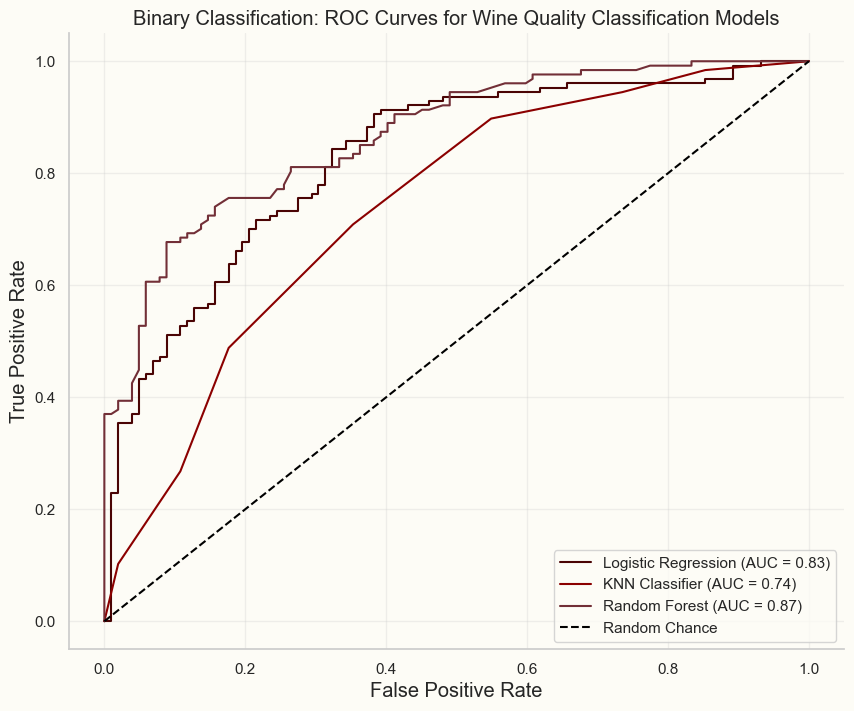

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Create a binary target variable:
# For example, consider wines with quality >= 6 as "good" (1) and the rest as "bad" (0)
df['quality_bin'] = (df['quality'] >= 6).astype(int)

# Define the features and binary target (assuming 'feature_cols' is already defined)
X = df[feature_cols]
y = df['quality_bin']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for models sensitive to feature scaling (like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a dictionary of classifiers to compare
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN Classifier": KNeighborsClassifier(n_neighbors=7),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
}

plt.figure(figsize=(10, 8))

# Loop through each model, fit it, and plot its ROC curve
for name, model in models.items():
    # For models that benefit from scaling, use the scaled features; otherwise, use the original.
    if name == "Logistic Regression":
        model.fit(X_train_scaled, y_train)
        y_probs = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_probs = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

# Plot the random chance line
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Binary Classification: ROC Curves for Wine Quality Classification Models")
plt.legend(loc="lower right")
plt.show()

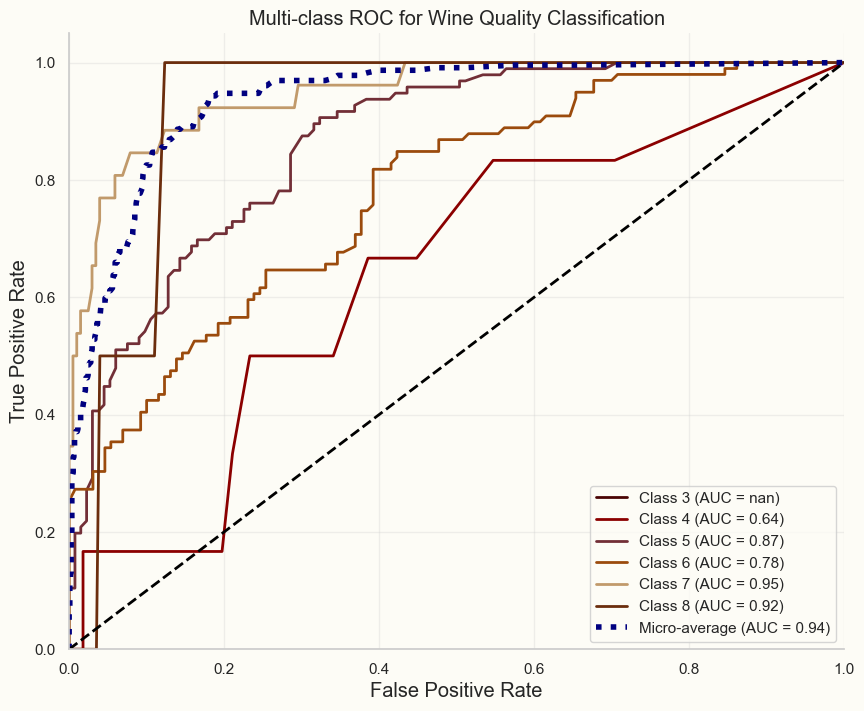

           Class       AUC
0              3       NaN
1              4  0.640508
2              5  0.865210
3              6  0.775291
4              7  0.947992
5              8  0.922907
6  Micro-average  0.937869


In [28]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assume df is your DataFrame and the target column is 'quality'
# Get the unique classes (e.g., quality scores)
classes = sorted(df['quality'].unique())
n_classes = len(classes)

# Binarize the output for multi-class ROC computation
y_bin = label_binarize(df['quality'], classes=classes)

# Define features and the multi-class target (using original features)
X = df[feature_cols]

# Split the data (here we split based on the full multi-class target)
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Initialize and fit OneVsRestClassifier with a RandomForestClassifier as the base estimator
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42))
clf.fit(X_train, y_train_bin)

# Predict probabilities on the test set
y_score = clf.predict_proba(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area (aggregating all classes)
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for each class with a micro-average curve
plt.figure(figsize=(10, 8))
colors = sns.color_palette(palette, n_classes)

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})")
    
plt.plot(fpr["micro"], tpr["micro"],
         label=f"Micro-average (AUC = {roc_auc['micro']:.2f})",
         color="navy", linestyle=":", linewidth=4)

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-class ROC for Wine Quality Classification")
plt.legend(loc="lower right")
plt.show()

# Create a list of dictionaries to hold the statistics for each class
roc_stats = []

# Add stats for each class
for i in range(n_classes):
    roc_stats.append({
        "Class": f"{classes[i]}",
        "AUC": roc_auc[i]
    })

# Add micro-average stats
roc_stats.append({
    "Class": "Micro-average",
    "AUC": roc_auc["micro"]
})

# Create a DataFrame from the list of statistics
roc_stats_df = pd.DataFrame(roc_stats)

# Display the DataFrame
print(roc_stats_df)

These classification models have relatively high AUC, despite the low R² of some of the regression models. The high AUC and the relatively low R² reflect two different modeling approaches and evaluation metrics.

- **AUC (Area Under the ROC Curve):**  
  This metric is based on the classification task and measures how well the model can distinguish between classes. In the multi-class ROC analysis (using a one-vs-rest strategy), a high AUC (close to 1) indicates that the classifier is very effective at ranking instances by their likelihood of belonging to each class. In this case, when wine quality is converted into discrete classes (or even a binary outcome), the classifier showed strong discriminative power.

- **R² Score:**  
  R² is used in regression tasks and indicates the proportion of variance in the target variable that is explained by the model. An R² score of less than 50% means that the regression model (like the Random Forest regression) is only able to explain less than half of the variability in wine quality. This can happen when the underlying relationships are complex, non-linear, or when there is significant noise in the data.

### Different questions, different answers

- **Different Problem Formulations:**  
  In the regression setting, the model is trying to predict exact quality scores, which are often noisy and can be hard to predict precisely. In the classification setting, especially after binarizing or categorizing wine quality, the problem is simplified into distinguishing between groups (e.g., “good” vs. “bad” wine), where the model might perform much better.

- **Metric Focus:**  
  - R² focuses on how well the model can predict the exact numeric values of wine quality.
  - AUC focuses on the ranking ability of the model (i.e., how well it separates one class from another), not on the precise values.

- **Data Characteristics:**  
  Wine quality is typically rated on a discrete scale, and converting it to classes might reduce some of the noise and variability that makes regression challenging. Thus, even if the regression model struggles to explain all the variance (resulting in a lower R²), the classification model can still distinguish between quality levels very effectively (resulting in a high AUC).

In summary, the metrics are measuring different things. A high AUC shows excellent classification performance, while a lower R² indicates challenges in predicting the exact continuous quality scores.


***

# Discussion and Conclusions

In this project, we set out to predict wine quality based on various chemical properties by employing multiple modeling approaches. Our analysis involved extensive feature engineering, where we created new features such as:

- **Density Minus One:** Highlighting deviations from the typical density of wine.
- **Log Transformations:** Applied to residual sugar, chlorides, and sulphates to reduce skewness and stabilize variance.
- **Acidity and SO₂ Ratios:** Combining fixed and volatile acidity, as well as calculating ratios like citric to fixed acidity and free to total sulfur dioxide to capture the balance of key chemical properties.

### Key Findings

- **Multiple Linear Regression:**  
  - *Mean Squared Error (MSE):* 0.36  
  - *R² Score:* 0.34 
  While providing a baseline, the linear model explained about 34% of the variance in wine quality.

- **KNN (K=7):**  
  - *MSE:* 0.41
  - *R² Score:* 0.26  
  The KNN model with 7 neighbors achieved less, with lower error and higher explained variance.

- **Random Forest:**  
  - *MSE:* 0.30
  - *R² Score:* 0.46  
  The Random Forest model performed better than KNN, offering robust performance and the added benefit of insights into feature importances.

### Future Research Possibilities

- **Advanced Feature Engineering:**  
  Further exploration of feature transformations, interaction terms, and domain-specific ratios may capture more nuances in the data.

- **Hyperparameter Tuning:**  
  More comprehensive tuning of model parameters using methods like RandomizedSearchCV or Bayesian Optimization could further enhance performance.

- **Alternative Models:**  
  Experimenting with more complex algorithms such as Gradient Boosting Machines, Support Vector Regression, or Neural Networks could potentially yield better predictive accuracy.

- **Ensemble Methods:**  
  Combining the strengths of multiple models (e.g., stacking or blending) might improve generalization and predictive performance.

- **Deeper Residual Analysis:**  
  Further analysis of residuals and error patterns could reveal additional areas for model improvement, such as addressing heteroscedasticity or non-linear relationships not captured by current models.

Overall, the project demonstrates that both KNN and Random Forest models can effectively predict wine quality, with KNN showing a slight edge in performance based on the current evaluation metrics. Future work should focus on refining these models and exploring alternative approaches to push the predictive accuracy further.
